<a href="https://colab.research.google.com/github/Carlys222/Unidad-4/blob/main/ei_u4_02_22150516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [1]:
# Karla Michel Jimenez Ortiz
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [2]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('tiempo ~ C(metodo)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(metodo),3.0,69.5,23.166667,9.423729,0.001771
Residual,12.0,29.5,2.458333,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


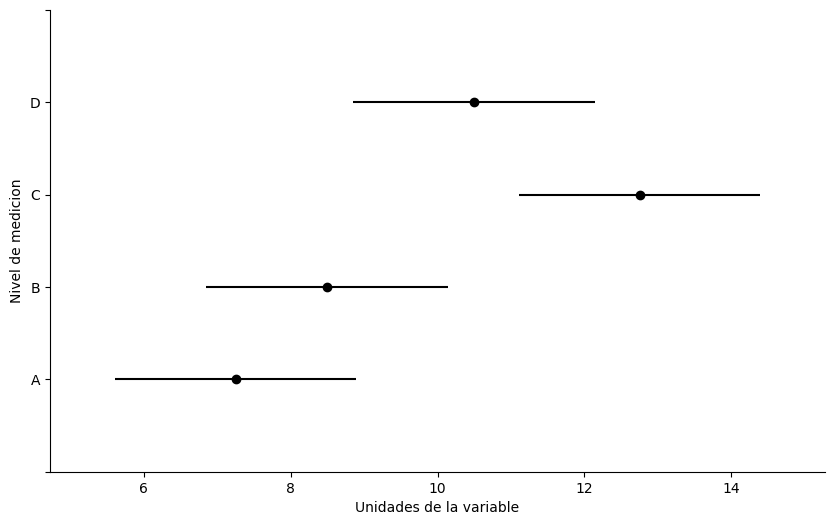

In [3]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['tiempo'], groups = df['metodo'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusion: El valor p indica evidencia significativa contra la hipótesis nula. Esto quiere decir que no todos los métodos de ensamble son iguales en cuanto a tiempo. El análisis post-hoc de Tukey identifica al método C como significativamente más lento en comparación con los métodos A y B. Aunque D no es estadísticamente diferente, su desempeño está más cercano a C que a A.



2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [4]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Tipo,Observaciones
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,Tipo,Observaciones
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [5]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Observaciones ~ C(Tipo)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Tipo),3.0,7019.458333,2339.819444,22.755356,0.000001
Residual,20.0,2056.500000,102.825000,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0  -62.553 -29.7803   True
     A      C -25.8333 0.0014 -42.2197   -9.447   True
     A      D    -35.5    0.0 -51.8863 -19.1137   True
     B      C  20.3333 0.0118    3.947  36.7197   True
     B      D  10.6667 0.2926  -5.7197   27.053  False
     C      D  -9.6667 0.3743  -26.053   6.7197  False
------------------------------------------------------


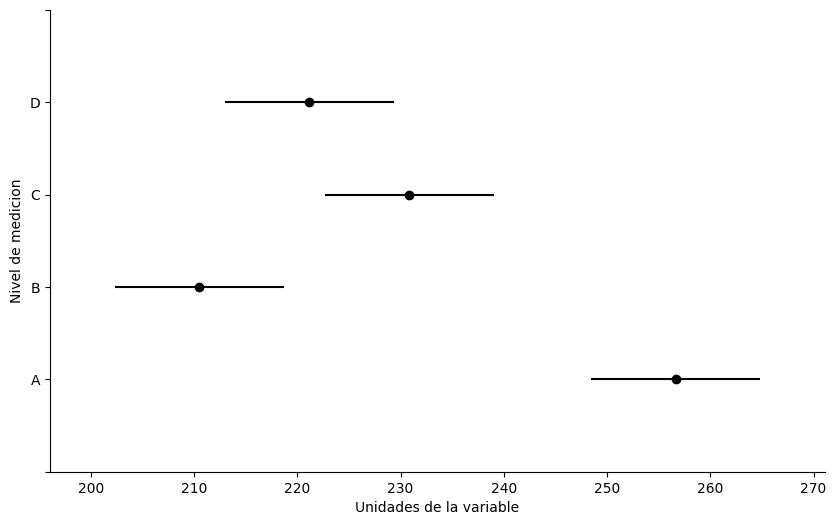

In [6]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Observaciones'], groups = df['Tipo'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
Se encontraron diferencias significativas en el desgaste de las suelas según el tipo de cuero utilizado (p < 0.000001). El cuero A presentó un desgaste considerablemente mayor en comparación con los cueros B, C y D. El análisis de Tukey reveló que las diferencias entre A y todos los demás tipos son significativas, mientras que B, C y D mostraron resultados más cercanos entre sí.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [7]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,tiempo
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,Tratamiento,tiempo
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [8]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('tiempo ~ C(Tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),3.0,95041.250000,31680.416667,1558.966022,1.260640e-27
Residual,24.0,487.714286,20.321429,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


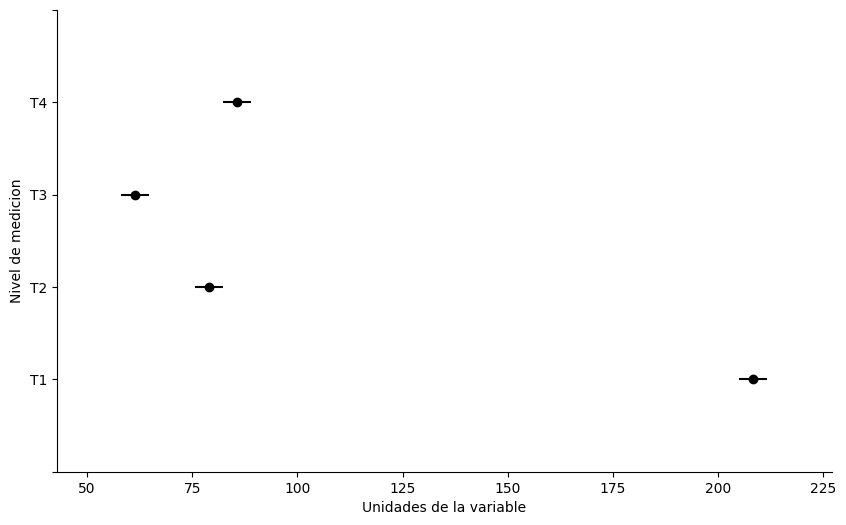

In [9]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['tiempo'], groups = df['Tratamiento'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
El tipo de tratamiento previo aplicado a los frijoles tiene un efecto significativo sobre su tiempo de cocción (p ≈ 1.26e-27). El tratamiento sin intervención (T1) es considerablemente menos eficiente. Los tratamientos T2 (bicarbonato), T3 (sal) y T4 (mezcla) reducen drásticamente el tiempo de cocción, siendo T3 el más efectivo.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [10]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Temperatura,Intensidad
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
40°C,22
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,Temperatura,Intensidad
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,40°C,22
9,60°C,23


In [11]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Intensidad ~ C(Temperatura)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Temperatura),4.0,3408.216667,852.054167,63.571306,1.285726e-09
Residual,16.0,214.450000,13.403125,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 100°C   20°C   -35.75    0.0  -43.681  -27.819   True
 100°C   40°C   -32.85    0.0 -40.3741 -25.3259   True
 100°C   60°C    -28.0    0.0  -35.931  -20.069   True
 100°C   80°C    -19.0    0.0  -26.931  -11.069   True
  20°C   40°C      2.9 0.7618  -4.6241  10.4241  False
  20°C   60°C     7.75 0.0571   -0.181   15.681  False
  20°C   80°C    16.75 0.0001    8.819   24.681   True
  40°C   60°C     4.85 0.3209  -2.6741  12.3741  False
  40°C   80°C    13.85 0.0003   6.3259  21.3741   True
  60°C   80°C      9.0 0.0224    1.069   16.931   True
------------------------------------------------------


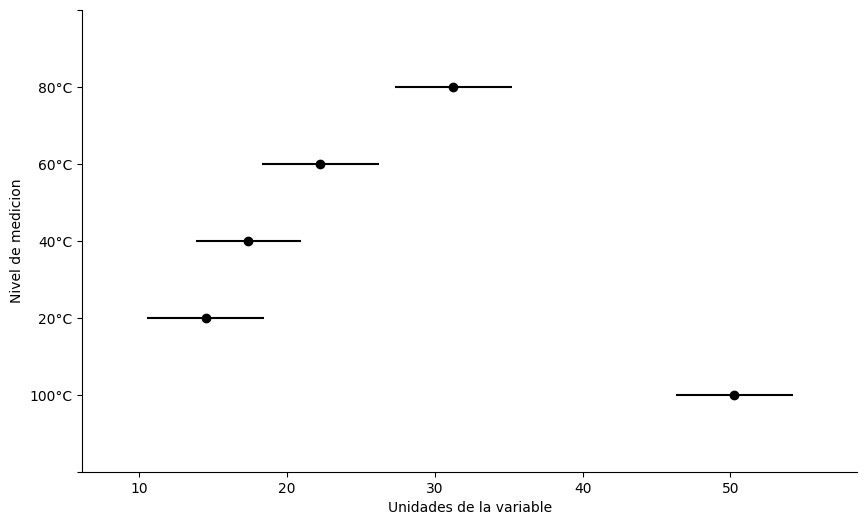

In [12]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Intensidad'], groups = df['Temperatura'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
Se comprobó que la temperatura a la que se someten los tableros electrónicos afecta significativamente la intensidad de corriente asociada a su deterioro (p ≈ 1.29e-9). A mayores temperaturas, la corriente aumenta, lo que indica mayor desgaste. El análisis post-hoc mostró que temperaturas desde 60 °C en adelante incrementan significativamente la degradación.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [13]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Porcentaje
Con tratam.,5.3
Con tratam.,4.0
Con tratam.,4.0
Con tratam.,4.0
Con tratam.,2.6
Con tratam.,2.1
Con tratam.,5.1
Con tratam.,4.1
Con tratam.,4.1
Con tratam.,3.2
Con tratam.,5.1
Con tratam.,2.2
Con tratam.,4.1
Sin tratam.,8.0
Sin tratam.,13.2
Sin tratam.,7.2
Sin tratam.,8.2
Sin tratam.,9.1
Sin tratam.,6.7
Sin tratam.,12.6
Sin tratam.,16.3
Sin tratam.,9.2
Sin tratam.,6.4
Sin tratam.,7.2
Sin tratam.,17.2
Sin tratam.,12.3
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,Tratamiento,Porcentaje
0,Con tratam.,5.3
1,Con tratam.,4.0
2,Con tratam.,4.0
3,Con tratam.,4.0
4,Con tratam.,2.6
5,Con tratam.,2.1
6,Con tratam.,5.1
7,Con tratam.,4.1
8,Con tratam.,4.1
9,Con tratam.,3.2


In [14]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Porcentaje ~ C(Tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),1.0,269.449615,269.449615,37.102806,0.000003
Residual,24.0,174.293846,7.262244,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper reject
----------------------------------------------------------
Con tratam. Sin tratam.   6.4385   0.0 4.2569  8.62   True
----------------------------------------------------------


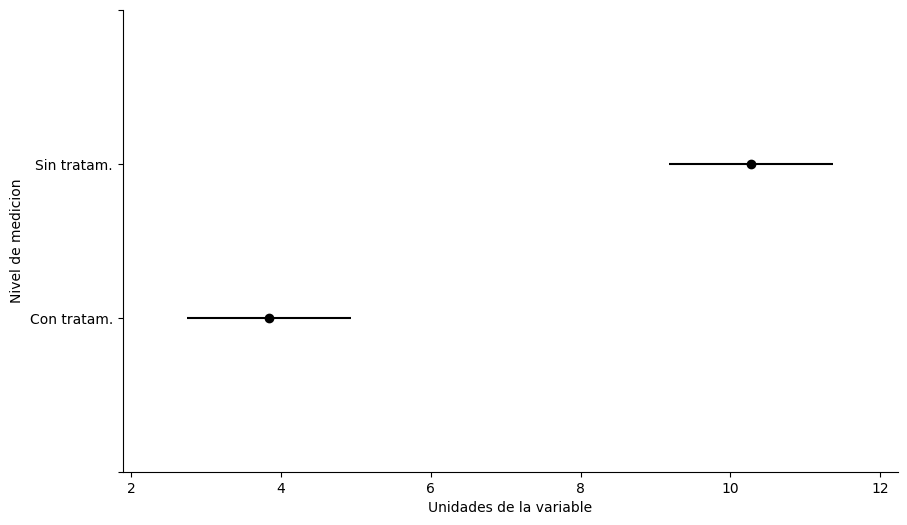

In [15]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Porcentaje'], groups = df['Tratamiento'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
El tratamiento propuesto para reducir el porcentaje de productos defectuosos mostró una diferencia significativa respecto a no aplicar ningún tratamiento (p = 0.000003). El promedio de defectos se redujo en más de 6 % en los lotes tratados.


6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [16]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Porcentaje_de_almidon,Dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,Porcentaje_de_almidon,Dureza
0,2,4.3
1,2,5.2
2,2,4.8
3,2,4.5
4,5,6.5
5,5,7.3
6,5,6.9
7,5,6.1
8,10,9.0
9,10,7.8


In [17]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Dureza ~ C(Porcentaje_de_almidon)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Porcentaje_de_almidon),2.0,26.726667,13.363333,58.101449,0.000007
Residual,9.0,2.070000,0.230000,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     2      5      2.0 0.0006 1.0532 2.9468   True
     2     10     3.65    0.0 2.7032 4.5968   True
     5     10     1.65 0.0023 0.7032 2.5968   True
--------------------------------------------------


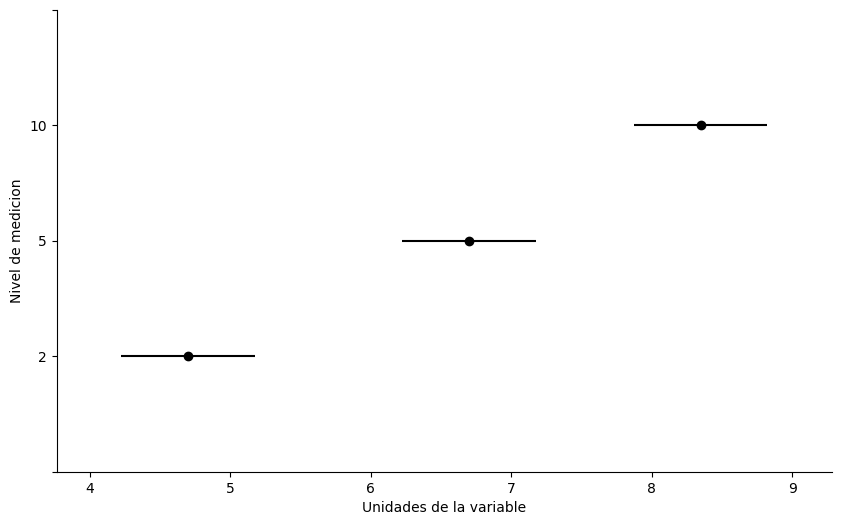

In [18]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Dureza'], groups = df['Porcentaje_de_almidon'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
La cantidad de almidón en la formulación de tabletas tiene un efecto estadísticamente significativo sobre su dureza (p ≈ 0.000007). A mayor concentración de almidón, mayor dureza se presenta en las tabletas.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [19]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Niveles,Rendimiento
1,14.823
1,14.676
1,14.720
1,14.514
1,15.065
2,25.151
2,25.401
2,25.131
2,25.031
2,25.267
3,32.605
3,32.460
3,32.256
3,32.669
3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,Niveles,Rendimiento
0,1,14.823
1,1,14.676
2,1,14.720
3,1,14.514
4,1,15.065
5,2,25.151
6,2,25.401
7,2,25.131
8,2,25.031
9,2,25.267


In [20]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Rendimiento ~ C(Niveles)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Niveles),2.0,788.342647,394.171323,10130.577704,4.300900e-20
Residual,12.0,0.466909,0.038909,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  10.4366   0.0 10.1038 10.7694   True
     1      3  17.6606   0.0 17.3278 17.9934   True
     2      3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


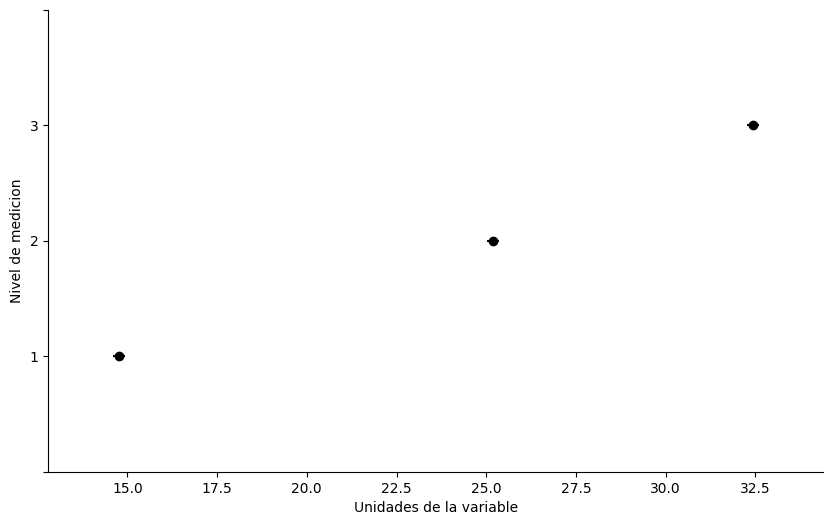

In [21]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Rendimiento'], groups = df['Niveles'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
Los niveles de fertilización nitrogenada afectan significativamente el rendimiento del pasto (p ≈ 4.3e-20). El aumento de nitrógeno incrementa significativamente la producción en toneladas por hectárea.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [22]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Aglutinante,Porcentaje_de_friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,Aglutinante,Porcentaje_de_friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [23]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Porcentaje_de_friabilidad ~ C(Aglutinante)', data = df).fit()

tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Aglutinante),2.0,292.920971,146.460485,4420.972597,6.198213e-18
Residual,12.0,0.397543,0.033129,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


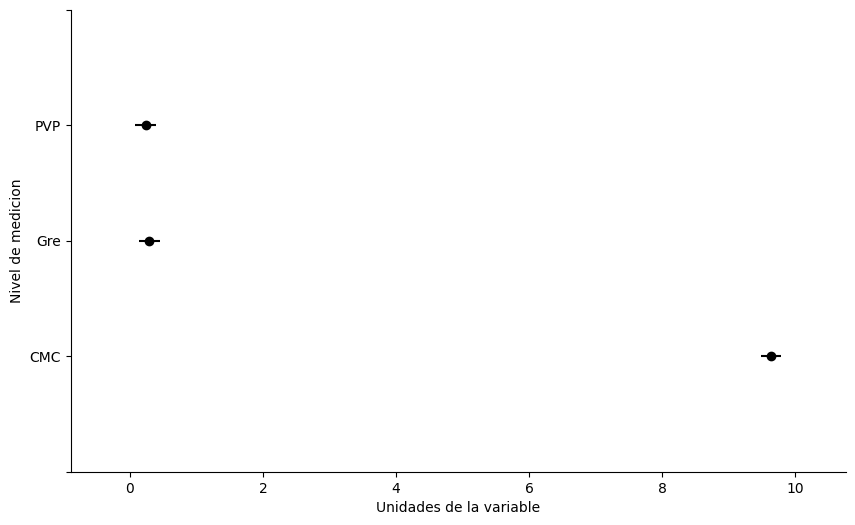

In [24]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Porcentaje_de_friabilidad'], groups = df['Aglutinante'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
El tipo de aglutinante tiene un impacto significativo en la friabilidad de las tabletas (p ≈ 6.2e-18). Las tabletas con CMC tienen una friabilidad muchísimo mayor, lo que indica menor resistencia. Las tabletas con PVP o grenetina presentan una estructura mucho más sólida.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [25]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Clona,Azucares_reductores
1,8.69
1,6.68
1,6.83
1,6.43
1,10.3
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,Clona,Azucares_reductores
0,1,8.69
1,1,6.68
2,1,6.83
3,1,6.43
4,1,10.30
5,2,8.00
6,2,16.41
7,2,12.43
8,2,10.99
9,2,15.53


In [26]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Azucares_reductores ~ C(Clona)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Clona),3.0,209.90716,69.969053,12.327073,0.000198
Residual,16.0,90.81676,5.676048,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


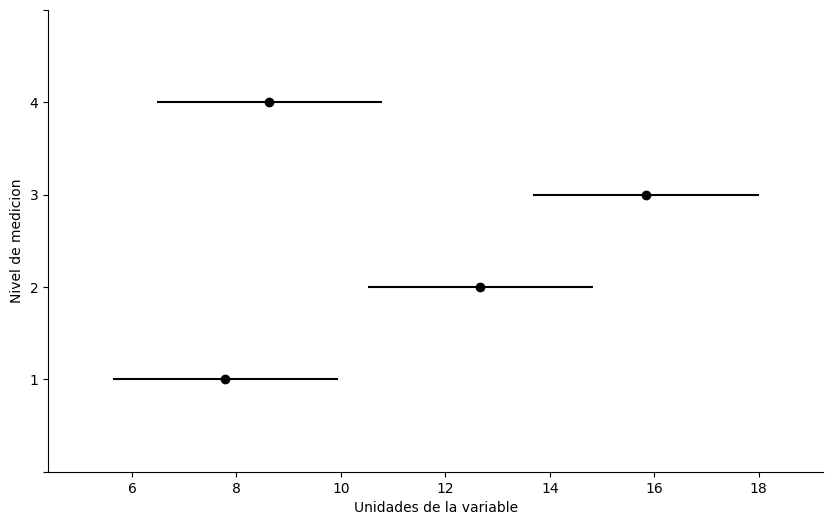

In [27]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Azucares_reductores'], groups = df['Clona'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
Las clonas de agave evaluadas presentan diferencias significativas en la producción de azúcares reductores (p = 0.000198). La clona 3 demostró el mayor nivel de azúcares, seguida por la 2.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [28]:
# Karla Michel Jimenez Ortiz
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Valoracion
con tratamiento,5.30
con tratamiento,4.03
con tratamiento,4.00
con tratamiento,2.56
con tratamiento,5.06
con tratamiento,4.06
con tratamiento,2.08
con tratamiento,4.03
con tratamiento,2.04
con tratamiento,1.18
sin tratamiento,8.02
sin tratamiento,13.18
sin tratamiento,7.15
sin tratamiento,9.11
sin tratamiento,8.23
sin tratamiento,16.3
sin tratamiento,9.20
sin tratamiento,6.35
sin tratamiento,7.15
sin tratamiento,8.66
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,Tratamiento,Valoracion
0,con tratamiento,5.30
1,con tratamiento,4.03
2,con tratamiento,4.00
3,con tratamiento,2.56
4,con tratamiento,5.06
5,con tratamiento,4.06
6,con tratamiento,2.08
7,con tratamiento,4.03
8,con tratamiento,2.04
9,con tratamiento,1.18


In [29]:
# Karla Michel Jimenez Ortiz
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Valoracion ~ C(Tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),1.0,174.109005,174.109005,30.605669,0.00003
Residual,18.0,102.398090,5.688783,NaN,NaN


Hay diferencias significativas entre al menos dos grupos.


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1          group2     meandiff p-adj lower upper reject
-----------------------------------------------------------------
con tratamiento sin tratamiento    5.901   0.0  3.66 8.142   True
-----------------------------------------------------------------


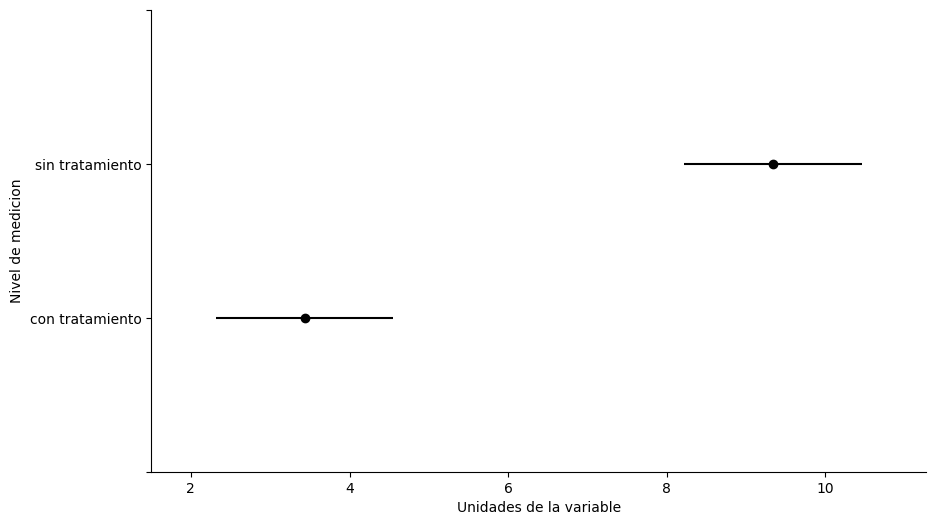

In [30]:
# Karla Michel Jimenez Ortiz
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Valoracion'], groups = df['Tratamiento'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

Conclusión:
El tratamiento de limpieza basado en fuerza centrípeta y aire ionizado tuvo un efecto significativo en la reducción del defecto de “cometas” en discos ópticos (p = 0.00003). Los lotes tratados mostraron porcentajes de defectos mucho menores.